# Lista de exercícios cálculo numérico

### Bibliotecas:

In [3]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import sys, os, inspect
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

import adjust
import interpolacao.div_diff as div_diff

## EXERCÍCIOS SOBRE AJUSTES DE CURVAS

### 1. Considere os dados da tabela

| i | X | Y |
|:-:|:-:|:-:|
| 1 | 1 | 4 |
| 2 | 1,4 | 3,7 |
| 3 | 2 | 2 |
| 4 | 3,1 | 0,5 |

a) Faça um ajuste linear e calcule o coeficiente de correlação (reta ajustada).

b) Encontre a equação da reta que passa pelos pontos $P_1$ e $P_4$. Compare com os coeficientes da reta do item (a).

c) Calcule o coeficiente de correlação da reta que passa pelos pontos $P_1$ e $P_4$ e compare com o resultado do item (a).

d) Faça um gráfico mostrando os pontos dados, a reta ajustada e a reta que passa em $P_1$ e $P_4$.

In [2]:
#a
P = np.array([[  1,   4],
              [1.4, 3.7],
              [  2,   2],
              [3.1, 0.5]])

A,B = adjust.normal_eq_mats(P,2)
coef_adj = adjust.solve_normal_eq(A,B)

print(coef_adj)
print("R2:",adjust.r2(P,coef_adj))

[[ 5.83639083]
 [-1.75274177]]
R2: [0.97141237]


In [3]:
#b, c
angc = (P[3][1]-P[0][1])/(P[3][0]-P[0][0])
linc = P[0][1]-angc*P[0][0]
coef_cal = np.array([[linc],
                 [angc]])

print(coef_cal)
print("R2:",adjust.r2(P,coef_cal))

[[ 5.66666667]
 [-1.66666667]]
R2: [0.96903461]


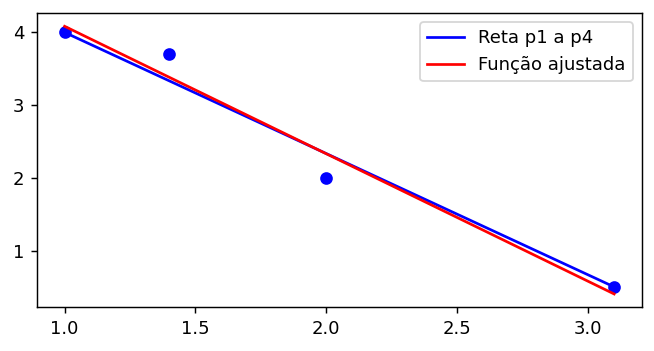

In [4]:
#d
f_adj = lambda x : adjust.pol_eq(x,coef_adj)
f_cal = lambda x : adjust.pol_eq(x,coef_cal)

xarr = np.linspace(P[0][0],P[-1][0],100)

plt.figure(figsize=(6, 3), dpi=130)
for x,y in P : plt.plot(x, y, 'bo')
plt.plot(xarr, f_cal(xarr), 'blue', label="Reta p1 a p4")
plt.plot(xarr, f_adj(xarr), 'red', label="Função ajustada")
plt.legend()
plt.show()

### 2. Os dados da tabela ao lado se referem a um ensaio de limites físicos de uma amostra de solo



| $U$, Umidade (%) | $G$, Golpes (un) |
|:-:|:-:|
| 43,42 | 27 |
| 45,25 | 22 |
| 49,27 | 17 |
| 53,42 | 9 |

a) Faça um ajuste linear da função $G(U)$ e calcule o coeficiente de correlação.

b) Calcule o número de golpes esperado para $U = 44 \%$.

c) Faça uma interpolação usando Diferenças Divididas e calcule $U = 44\%$.

d) Compare com o resultado do item (b). Você esperava o mesmo valor? Justifique sua resposta.

In [5]:
# a, b
P = np.array([[43.42, 27],
              [45.25, 22],
              [49.27, 17],
              [53.42,  9]])

A,B = adjust.normal_eq_mats(P,2)
coef_adj = adjust.solve_normal_eq(A,B)
f_adj = lambda x : adjust.pol_eq(x,coef_adj)

print(coef_adj)
print("R2:", adjust.r2(P,coef_adj))
print("G(44):", f_adj(44))

[[100.69477146]
 [ -1.71289238]]
R2: [0.98645157]
G(44): [25.32750674]


In [6]:
# c
print("Diferenças divididas:", div_diff.solve(44,[x for x,_ in P],[y for _,y in P]))

Diferenças divididas: 25.101634768180364


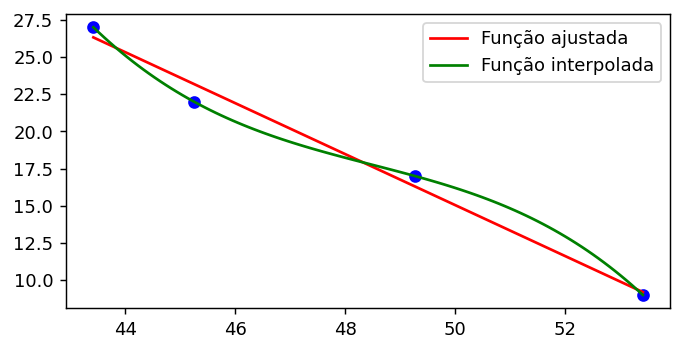

In [7]:
# d
f_int = lambda x : div_diff.solve(x,[xi for xi,_ in P],[yi for _,yi in P])

xarr = np.linspace(P[0][0],P[-1][0],100)

plt.figure(figsize=(6, 3), dpi=130)
for x,y in P : plt.plot(x, y, 'bo')
plt.plot(xarr, f_adj(xarr), 'red', label="Função ajustada")
plt.plot(xarr, f_int(xarr), 'green', label="Função interpolada")
plt.legend()
plt.show()

### 3. a) Utilize o Método dos Mínimos Quadrados na versão matricial para ajustar linearmente os dados da tabela.

b) Escreva as equações normais do ajuste linear.

| i | X | Y |
|:-:|:-:|:-:|
| 1 |0,5| 5 |
| 2 | 1 | 2 |
| 3 | 2 | 1 |

In [8]:
P = np.array([[0.5, 5],
              [  1, 2],
              [  2, 1]])

A,B = adjust.normal_eq_mats(P,2)
coef_adj = adjust.solve_normal_eq(A,B)


print("At.A",A.T.dot(A),"At.B",A.T.dot(B),"x:",coef_adj,sep='\n')

At.A
[[3.   3.5 ]
 [3.5  5.25]]
At.B
[[8. ]
 [6.5]]
x:
[[ 5.5       ]
 [-2.42857143]]


### 4. Determine a terna de parâmetros $a$, $b$ e $c$ do plano que melhor descreve a distribuição de pontos no espaço, dada pela tabela: (Equação do plano: $z = ax + by + c$)

| i | X | Y | Z |
|:-:|:-:|:-:|:-:|
| 1 | 1 | 0 | 0 |
| 2 | 0 | 1 | 0 |
| 3 | 0 | 0 | 1 |
| 4 |0,5|0,5|0,5|

[[-0.83333333]
 [-0.83333333]
 [ 1.        ]]


<IPython.core.display.Javascript object>


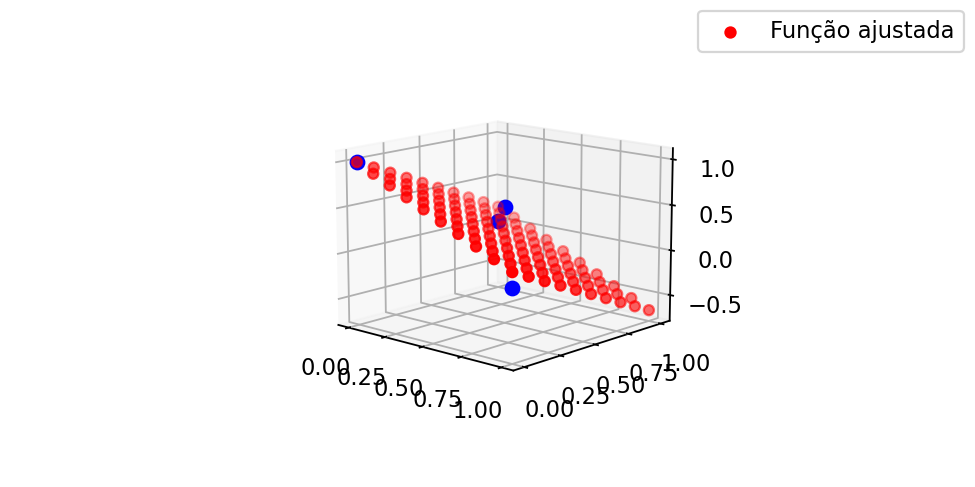

In [21]:
P = np.array([[  1,  0,  0],
              [  0,  1,  0],
              [  0,  0,  1],
              [0.5,0.5,0.5]])

A = np.array([[x, y, 1] for x,y,_ in P])
B = np.array([[z] for _,_,z in P])

coef_adj = adjust.solve_normal_eq(A,B)
print(coef_adj)

x_pred = np.linspace(0,1,10)
y_pred = np.linspace(0,1,10)
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()])
zarr = np.array(list(map(lambda x : coef_adj[0]*x[0]+coef_adj[1]*x[1]+coef_adj[2], model_viz.T)))

%matplotlib widget
fig = plt.figure(figsize=(6, 3), dpi=130)
ax = fig.add_subplot(111, projection='3d')
for x,y,z in P : ax.plot(x, y, 'bo', zs=z)
ax.scatter(model_viz[0], model_viz[1], zarr, color='red', label="Função ajustada")
#ax.plot(0,0,'bo',zs=-0.833333)
fig.legend()
fig.show()

### 5. Os dados da tabela e a figura abaixo referem-se a um ensaio de compactação de solo. O objetivo é determinar o percentual de umidade $U$ para a maior massa específica aparente($\rho$).

| $$U,$$ Umidade (%) | $$\rho (kN/m^3)$$ |
|:-:|:-:|
|21,16|13,41|
|22,96|13,87|
|25,11|14,50|
|27,02|14,60|
|29,64|14,45|
|32,00|13,60|

a) Faça um ajuste com um polinômio de $2^o$ Grau. ($\rho(U) = AU^2 + BU + C$)

b) Derive a função $\rho(U)$ e iguale-a a zero.

c) Calcule a raiz de $\rho'(U)=0$.

d) Escreva o significado do resultado do item (c) no problema proposto.

[[-13.03747138]
 [  2.04980212]
 [ -0.03798662]]


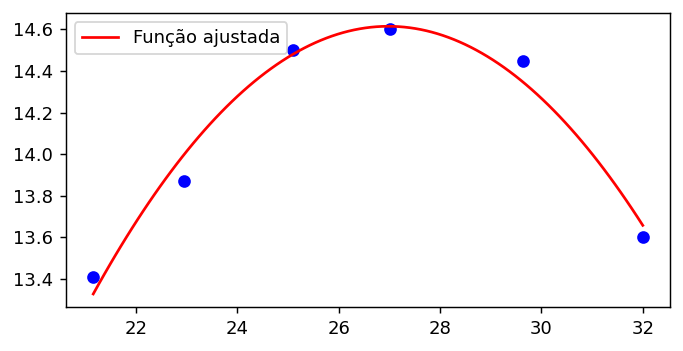

In [10]:
# a
P = np.array([[21.16, 13.41],
              [22.96, 13.87],
              [25.11, 14.50],
              [27.02, 14.60],
              [29.64, 14.45],
              [32.00, 13.60]])

A,B = adjust.normal_eq_mats(P,3)
coef_adj = adjust.solve_normal_eq(A,B)

print(coef_adj)

%matplotlib inline
f_adj = lambda x : adjust.pol_eq(x,coef_adj)
xarr = np.linspace(P[0][0],P[-1][0],100)
plt.figure(figsize=(6, 3), dpi=130)
for x,y in P : plt.plot(x, y, 'bo')
plt.plot(xarr, f_adj(xarr), 'red', label="Função ajustada")
plt.legend()
plt.show()

In [11]:
# b, c, d

# rho(U) = -0.003U^2 + 2.049U -13.034
# rho'(U) = -2*0.003U + 2.049
# x0 (reta) = -b/a => x0 (curva) = -b/2a

raiz = -coef_adj[1]/(2*coef_adj[2])
print(raiz, raiz*(2*coef_adj[2]) + coef_adj[1])

print("d) É o ponto de vértice da parábola ajustada.")

[26.98057722] [0.]
d) É o ponto de vértice da parábola ajustada.


### 6. Gere 5 valores da função $y = x^{\frac{1}{3}}$ no intervalo $[0,1]$. Aproxime a função dada usando polinômios de $1^o$, $2^o$ e $3^o$ graus. Qual é a melhor aproximação?

R2 1o: [0.0584613]
R2 2o: [0.97052836]
R2 3o: [0.99137418]


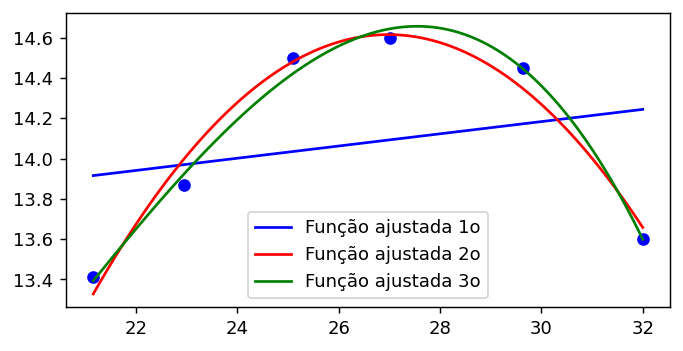

In [12]:
f = lambda x : x**(1/3)

P = np.array([[   0, f(0)],
              [0.25, f(0.25)],
              [ 0.5, f(0.5)],
              [0.75, f(0.75)],
              [   1, f(1)]])

P = np.array([[21.16, 13.41],
              [22.96, 13.87],
              [25.11, 14.50],
              [27.02, 14.60],
              [29.64, 14.45],
              [32.00, 13.60]])

xarr = np.linspace(P[0][0],P[-1][0],100)
plt.figure(figsize=(6, 3), dpi=130)
for x,y in P : plt.plot(x, y, 'bo')

A,B = adjust.normal_eq_mats(P,2)
coef_adj = adjust.solve_normal_eq(A,B)
print("R2 1o:", adjust.r2(P,coef_adj))
f_adj = lambda x : adjust.pol_eq(x,coef_adj)
plt.plot(xarr, f_adj(xarr), 'blue', label="Função ajustada 1o")

A,B = adjust.normal_eq_mats(P,3)
coef_adj = adjust.solve_normal_eq(A,B)
print("R2 2o:", adjust.r2(P,coef_adj))
f_adj = lambda x : adjust.pol_eq(x,coef_adj)
plt.plot(xarr, f_adj(xarr), 'red', label="Função ajustada 2o")

A,B = adjust.normal_eq_mats(P,4)
coef_adj = adjust.solve_normal_eq(A,B)
print("R2 3o:", adjust.r2(P,coef_adj))
f_adj = lambda x : adjust.pol_eq(x,coef_adj)
plt.plot(xarr, f_adj(xarr), 'green', label="Função ajustada 3o")

plt.legend()
plt.show()

### 7. Ajustar os pontos da tabela à função $Z = a \cdot e^{bX}$

| i | $x_i$ | $z_i$ |
|:-:|:-:|:-:|
|1|0,1|5,9|
|2|1,5|8,8|
|3|3,3|12|
|4|4,5|19,8|
|5|5|21,5|

[[5.70141388]
 [0.26283157]]


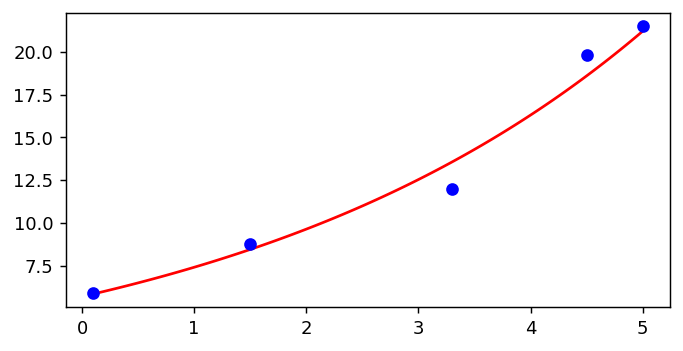

In [13]:
P = [[0.1,  5.9],
     [1.5,  8.8],
     [3.3,   12],
     [4.5, 19.8],
     [  5, 21.5]]

A = np.array([[x**i for i in range(2)] for x,_ in P])
B = np.array([[np.log(y)] for _,y in P])

coef_adj = adjust.solve_normal_eq(A,B)
coef_adj[0] = np.e**coef_adj[0] # Ajustar para A

print(coef_adj)

f = lambda x : coef_adj[0]*np.e**(coef_adj[1]*x)
xarr = np.linspace(P[0][0],P[-1][0],100)

plt.figure(figsize=(6, 3), dpi=130)
plt.plot(xarr, f(xarr), 'red', label="Função Ajustada")
for x,y in P : plt.plot(x, y, 'bo')
plt.show()

### 8. A constante de velocidade ($k$) de uma reação química de 1ª ordem é relacionada com a concentração ($C$) e o tempo pela equação

$$C = C_0 e^{-kt}$$

Onde $C_0$ é a concentração inicial. Calcule a constante de velocidade da reação cujos valores de $t$ e $C$ são dados na tabela.

| i | $$t_i(s)$$ | $$C(M)$$ |
|:-:|:-:|:-:|
|1|0,05|0,86|
|2|0,1|0,68|
|3|0,15|0,59|
|4|0,2|0,47|
|5|0,25|0,43|
|6|0,3|0,38|

k: [3.24921045]
R2: [0.97965554]


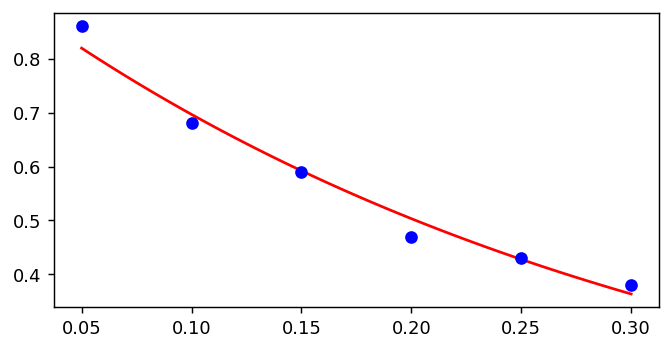

In [14]:
P = [[0.05, 0.86],
     [ 0.1, 0.68],
     [0.15, 0.59],
     [ 0.2, 0.47],
     [0.25, 0.43],
     [ 0.3, 0.38]]

A = np.array([[x**i for i in range(2)] for x,_ in P])
B = np.array([[np.log(y)] for _,y in P])

coef_adj = adjust.solve_normal_eq(A,B)
coef_adj[0] = np.e**coef_adj[0] # Ajustar para A

f = lambda x : coef_adj[0]*np.e**(coef_adj[1]*x)

avg = sum(y for _,y in P)/len(P)
r2 = 1-sum((y-f(x))**2 for x,y in P)/sum((y-avg)**2 for _,y in P)

print('k:',coef_adj[1]*-1)

print('R2:',r2)

xarr = np.linspace(P[0][0],P[-1][0],100)

plt.figure(figsize=(6, 3), dpi=130)
plt.plot(xarr, f(xarr), 'red', label="Função Ajustada")
for x,y in P : plt.plot(x, y, 'bo')
plt.show()

### 9. Para uma reação química de 2ª ordem, o modelo matemático é

$$\frac{1}{C} = \frac{1}{C_0} + kt$$

Calcule a constante de velocidade ($k$) da reação usando os dados do exercício
anterior. Qual dos dois modelos ($1^a$ ou $2^a$ ordem ) é o melhor para expressar os dados
da reação ?

k: [5.90952289]
R2: [0.9952981]


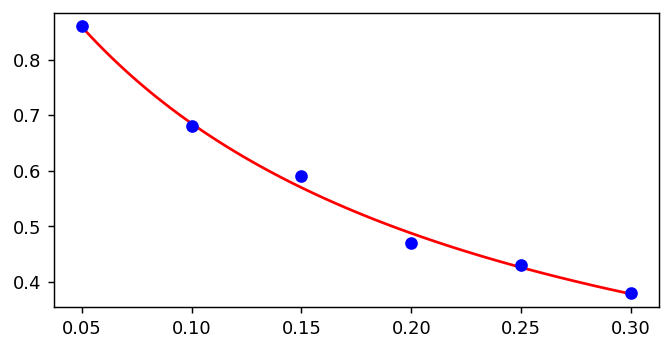

In [15]:
P = [[0.05, 0.86],
     [ 0.1, 0.68],
     [0.15, 0.59],
     [ 0.2, 0.47],
     [0.25, 0.43],
     [ 0.3, 0.38]]

A = np.array([[1,x] for x,_ in P])
B = np.array([[1/y] for _,y in P])

coef_adj = adjust.solve_normal_eq(A,B)
coef_adj[0] = 1/coef_adj[0] # Ajustar para A

f = lambda x : 1/((1/coef_adj[0])+coef_adj[1]*x)

avg = sum(y for _,y in P)/len(P)
r2 = 1-sum((y-f(x))**2 for x,y in P)/sum((y-avg)**2 for _,y in P)

print('k:',coef_adj[1])

print('R2:',r2)

xarr = np.linspace(P[0][0],P[-1][0],100)

plt.figure(figsize=(6, 3), dpi=130)
plt.plot(xarr, f(xarr), 'red', label="Função Ajustada")
for x,y in P : plt.plot(x, y, 'bo')
plt.show()

### 10. Ajuste os pontos abaixo ao modelo $Y = b_0 + b_1X_1 + b_2X_2$. Calcule o coeficiente de correlação.

| i | $$x_{1i}$$ | $$x_{x_2i}$$ | $$y_i$$ |
|:-:|:-:|:-:|:-:|
|1|-5|0|5,1|
|2|-3|0,2|6,3|
|3|-1|0,3|7,4|
|4|0|0,5|8,9|
|5|1|0,6|9,5|
|6|3|0,8|10,7|
|7|4|1|11,5|

In [16]:
P = [[-5,   0,  5.1],
     [-3, 0.2,  6.3],
     [-1, 0.3,  7.4],
     [ 0, 0.5,  8.9],
     [ 1, 0.6,  9.5],
     [ 3, 0.8, 10.7],
     [ 4,   1, 11.5]]

A = np.array([[1,x,y] for x,y,_ in P])
B = np.array([[z] for _,_,z in P])

coef_adj = adjust.solve_normal_eq(A,B)

f = lambda x,y : coef_adj[0]+coef_adj[1]*x+coef_adj[2]*y

avg = sum(z for _,_,z in P)/len(P)
r2 = 1-sum((z-f(x,y))**2 for x,y,z in P)/sum((z-avg)**2 for _,_,z in P)

print(coef_adj)

print('R2:',r2)

[[7.13426883]
 [0.41344165]
 [2.90398818]]
R2: [0.99239899]


### 11. Ajuste os pontos da tabela do exercício anterior ao modelo $Y = b_0 + b_1X_1^2+ b_2X_2^2$. Compare com o exercício anterior.

In [17]:
P = [[-5,   0,  5.1],
     [-3, 0.2,  6.3],
     [-1, 0.3,  7.4],
     [ 0, 0.5,  8.9],
     [ 1, 0.6,  9.5],
     [ 3, 0.8, 10.7],
     [ 4,   1, 11.5]]

A = np.array([[1,x*x,y*y] for x,y,_ in P])
B = np.array([[z] for _,_,z in P])

coef_adj = adjust.solve_normal_eq(A,B)

f = lambda x,y : coef_adj[0]+coef_adj[1]*x*x+coef_adj[2]*y*y

avg = sum(z for _,_,z in P)/len(P)
r2 = 1-sum((z-f(x,y))**2 for x,y,z in P)/sum((z-avg)**2 for _,_,z in P)

print(coef_adj)

print('R2:',r2)

[[ 7.21976868]
 [-0.09226155]
 [ 6.08805613]]
R2: [0.98279953]
